# Data Loading

In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Set seeds
np.random.seed(42)
random.seed(42)

In [2]:
df = pd.read_excel('/kaggle/input/male-fertility/DIB dataset and codebook.xlsx')

In [3]:
df.head()

,ID,Age,Religion,Ethnicity,Marital status,Marriage period,No. of children,Educational level,Employment status,Working period,...,JS33,JS34,JS35,JS36,JP1,JP2,JP3,JP4,JP5,JP6
0,1,2,1,1,1,1,1,6,1,4,...,5,4,4,4,4,4,4,2,5,5
1,2,2,1,1,1,2,1,6,1,3,...,5,3,5,5,5,5,4,5,5,5
2,3,2,1,1,1,2,1,6,1,5,...,5,5,5,5,5,5,5,5,5,5
3,4,3,1,1,2,1,2,5,1,5,...,4,5,5,5,2,2,2,4,5,5
4,5,2,1,1,1,1,1,6,1,3,...,5,5,5,5,5,5,5,5,5,5


In [4]:
# Calculate the mean of OS1 to OS35 and assign it to the new column OS
df['JS'] = df.loc[:, 'JS1':'JS36'].sum(axis=1)

def min_max_normalize(column):
    min_val = column.min()
    max_val = column.max()
    normalized_column = (column - min_val) / (max_val - min_val)
    return normalized_column

df['JS_norm'] = min_max_normalize(df['JS'])

#Creating Labels of target column JS

rating = []
for row in df['JS_norm']:
    if row <= 0.5:
        rating.append(0)
    else:
        rating.append(1)
df['Target'] = rating

In [5]:
df.drop(columns=['JS1', 'JS2', 'JS3', 'JS4', 'JS5', 'JS6', 'JS7', 'JS8', 'JS9', 'JS10', 'JS11', 'JS12', 'JS13', 'JS14', 'JS15', 'JS16', 'JS17', 'JS18', 'JS19', 'JS20', 'JS21', 'JS22', 'JS23', 'JS24', 'JS25', 'JS26', 'JS27', 'JS28', 'JS29', 'JS30', 'JS31', 'JS32', 'JS33', 'JS34', 'JS35', 'JS36'], inplace=True)
df = df.drop(columns=['ID', 'JS_norm', 'JS'])
df = df.drop(columns=['JP1', 'JP2', 'JP3', 'JP4', 'JP5', 'JP6'])

In [6]:
df.head()

,Age,Religion,Ethnicity,Marital status,Marriage period,No. of children,Educational level,Employment status,Working period,Household income,...,OS33,OS34,OS35,OS36,OS37,OS38,OS39,OS40,OS41,Target
0,2,1,1,1,1,1,6,1,4,7,...,5,5,5,4,4,4,4,4,4,1
1,2,1,1,1,2,1,6,1,3,4,...,4,5,5,3,2,3,2,3,3,0
2,2,1,1,1,2,1,6,1,5,7,...,4,5,5,3,4,4,3,4,4,1
3,3,1,1,2,1,2,5,1,5,10,...,2,5,4,3,4,4,3,3,3,1
4,2,1,1,1,1,1,6,1,3,5,...,5,5,5,4,4,4,4,4,4,1


# Data Splitting

In [7]:
X = df.drop(['Target'], axis=1)  # Features
y = df['Target']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42) 

In [8]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrame for easier handling
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Feature Selection

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np

# Initialize models
models = {
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'LGBMClassifier': LGBMClassifier(verbose=-1),
    'XGBClassifier': XGBClassifier(),
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(kernel='linear'),  # SVC with linear kernel for feature importances
    'KNeighborsClassifier': KNeighborsClassifier()
}

# Fit models and extract feature importances
importances = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    if hasattr(model, 'feature_importances_'):
        importances[name] = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances[name] = np.abs(model.coef_[0])
    else:
        importances[name] = np.zeros(X_train.shape[1])  # Default if no importances or coefficients


In [10]:
# Convert to DataFrame
importance_df = pd.DataFrame(importances, index=X_train.columns)

# Normalize importances
normalized_importances = importance_df.div(importance_df.sum(axis=0), axis=1)

# Aggregate importances
aggregated_importances = normalized_importances.mean(axis=1)


In [11]:
# Sort features by aggregated importance
sorted_features = aggregated_importances.sort_values(ascending=False)

# Display the top features
print("Top 20 Features Based on Aggregated Importances:")
print(sorted_features.head(20))


Top 20 Features Based on Aggregated Importances:
OS19                0.084855
OS15                0.055809
Household income    0.053720
OS8                 0.041718
OS18                0.036915
OS17                0.027941
OS21                0.027067
OS33                0.025979
OS12                0.025626
OS29                0.023796
OS16                0.022769
OS37                0.022222
OS11                0.021943
OS1                 0.021470
OS31                0.021341
OS7                 0.020774
OS27                0.020722
OS5                 0.020675
OS30                0.020453
OS23                0.019238
dtype: float64


In [12]:
# Get the top 28 features
top_n = 20
top_features = sorted_features.head(top_n)

# Convert top_features to a list of feature names
feature_list = top_features.index.tolist()

# Display the list of top 28 features
print("List of Top 20 Features:")
print(feature_list)

List of Top 20 Features:
['OS19', 'OS15', 'Household income', 'OS8', 'OS18', 'OS17', 'OS21', 'OS33', 'OS12', 'OS29', 'OS16', 'OS37', 'OS11', 'OS1', 'OS31', 'OS7', 'OS27', 'OS5', 'OS30', 'OS23']


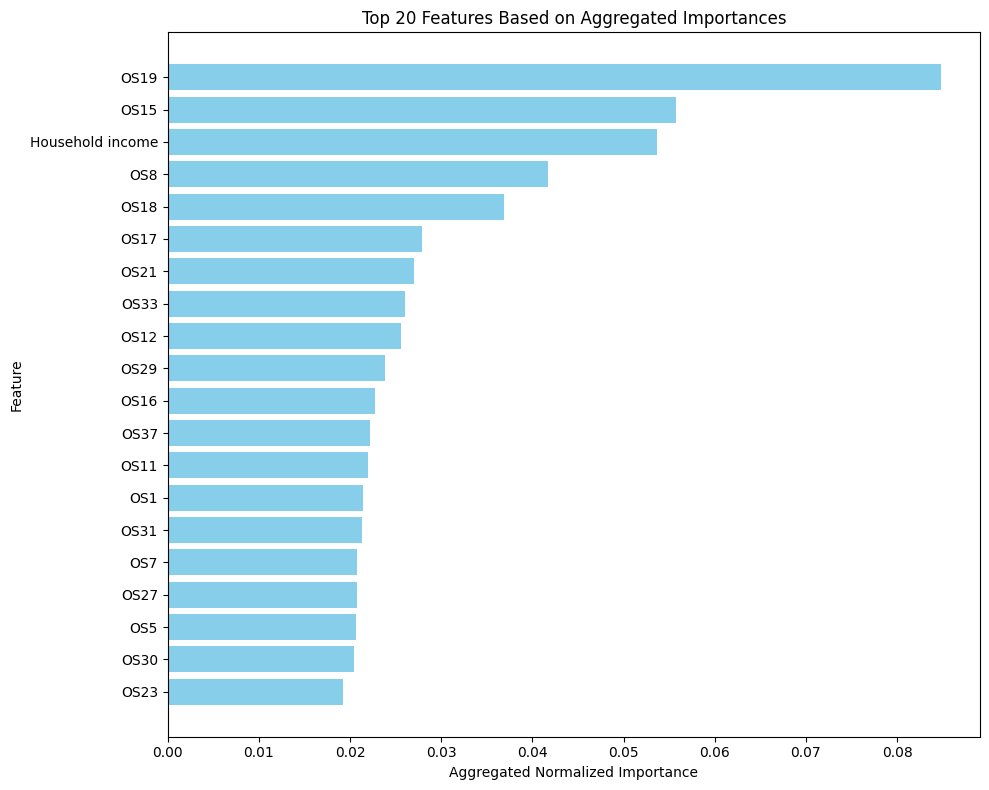

In [15]:
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(10, 8))

# Create a horizontal bar plot
plt.barh(top_features.index, top_features.values, color='skyblue')

# Add titles and labels
plt.title('Top 20 Features Based on Aggregated Importances')
plt.xlabel('Aggregated Normalized Importance')
plt.ylabel('Feature')

# Ensure the plot displays features from top to bottom in order of importance
plt.gca().invert_yaxis()

# Display the plot
plt.tight_layout()
plt.savefig('model_based_features.png', format='png', bbox_inches='tight')
plt.show()
